In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('COVIDMEXICO.csv')

In [3]:
data.set_index("ID_REGISTRO", inplace = True) 

In [4]:
data

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
0192e7,2020-05-28,2,3,2,2,2,2,2,2,2020-04-06,...,2,2,1,2,99,1,99,México,99,1
02e0df,2020-05-28,2,4,12,2,12,12,1,2,2020-03-26,...,2,1,2,2,99,1,99,México,99,1
02b7ac,2020-05-28,2,4,14,1,14,14,120,1,2020-04-07,...,2,2,2,2,99,1,99,México,99,97
17979d,2020-05-28,2,4,27,1,27,27,4,1,2020-04-20,...,2,1,2,2,99,1,99,México,99,97
15778b,2020-05-28,2,4,27,1,27,27,4,1,2020-04-09,...,2,2,2,2,99,1,99,México,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275d,2020-05-28,1,12,7,2,7,7,101,1,2020-05-26,...,2,2,2,2,2,3,99,México,99,97
107e21,2020-05-28,2,12,21,1,21,21,74,1,2020-05-27,...,2,2,2,2,1,3,99,México,99,97
0bdab3,2020-05-28,1,12,9,1,9,9,11,1,2020-05-27,...,2,2,2,2,2,3,99,México,99,97


In [5]:
data.isnull().sum().sum()

0

In [6]:
data['PAIS_NACIONALIDAD'] = data['PAIS_NACIONALIDAD'].str.replace(u"á", "a")
data['PAIS_NACIONALIDAD'] = data['PAIS_NACIONALIDAD'].str.replace(u"é", "e")
data['PAIS_NACIONALIDAD'] = data['PAIS_NACIONALIDAD'].str.replace(u"í", "i")
data['PAIS_NACIONALIDAD'] = data['PAIS_NACIONALIDAD'].str.replace(u"ó", "o")
data['PAIS_NACIONALIDAD'] = data['PAIS_NACIONALIDAD'].str.replace(u"ú", "u")

# PREDICIENDO SI SE NECESITARÁ UCI

In [7]:
data.head()

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
0192e7,2020-05-28,2,3,2,2,2,2,2,2,2020-04-06,...,2,2,1,2,99,1,99,Mexico,99,1
02e0df,2020-05-28,2,4,12,2,12,12,1,2,2020-03-26,...,2,1,2,2,99,1,99,Mexico,99,1
02b7ac,2020-05-28,2,4,14,1,14,14,120,1,2020-04-07,...,2,2,2,2,99,1,99,Mexico,99,97
17979d,2020-05-28,2,4,27,1,27,27,4,1,2020-04-20,...,2,1,2,2,99,1,99,Mexico,99,97
15778b,2020-05-28,2,4,27,1,27,27,4,1,2020-04-09,...,2,2,2,2,99,1,99,Mexico,99,97


In [8]:
data.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,UCI
count,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,...,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000,254794.000000
mean,1.636569,9.673960,14.825129,1.510758,16.063286,15.115831,36.511323,1.238824,74.316487,1.832045,...,2.189318,2.477484,2.338513,2.197752,2.332716,2.277267,32.518721,1.822331,98.570296,74.315282
std,0.480988,7.872305,7.992788,0.499885,10.697833,7.894707,47.443228,0.426366,40.525618,0.633173,...,5.873226,7.010354,5.906619,5.915636,5.826457,5.936576,45.437110,0.655526,6.452570,40.528244
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,9.000000,1.000000,9.000000,9.000000,7.000000,1.000000,97.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,99.000000,97.000000
50%,2.000000,12.000000,14.000000,2.000000,15.000000,15.000000,20.000000,1.000000,97.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,97.000000
75%,2.000000,12.000000,21.000000,2.000000,21.000000,21.000000,48.000000,1.000000,97.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,99.000000,97.000000
max,2.000000,99.000000,32.000000,2.000000,99.000000,32.000000,999.000000,2.000000,99.000000,99.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000,99.000000


In [9]:
data.columns

Index(['FECHA_ACTUALIZACION', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO',
       'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [10]:
DF1 = data.drop(["FECHA_ACTUALIZACION","FECHA_INGRESO","ENTIDAD_NAC","FECHA_DEF","HABLA_LENGUA_INDIG","MIGRANTE","PAIS_ORIGEN"], axis=1)

In [11]:
len(DF1.loc[DF1['UCI'] ==97, ['UCI']])

193943

In [12]:
DF1['UCI'] = DF1['UCI'].replace(97, 2)

In [13]:
len(DF1.loc[DF1['UCI'] ==99, ['UCI']])

65

In [14]:
future = DF1.loc[DF1['UCI'] == 99]
present = DF1.loc[DF1['RESULTADO'] != 99]

In [15]:
present.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_SINTOMAS', 'INTUBADO',
       'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'DIABETES', 'EPOC',
       'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR',
       'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO',
       'PAIS_NACIONALIDAD', 'UCI'],
      dtype='object')

In [16]:
from sklearn.preprocessing import OrdinalEncoder
encod = OrdinalEncoder()
paises = list(set(present["PAIS_NACIONALIDAD"]))
pa = []
for i in range(len(paises)):
    pa.append([paises[i], i])

In [17]:
paises_encoded = encod.fit_transform(pa)
dic = {}
for i in range(len(paises_encoded)):
    dic[paises[i]] = paises_encoded[i][0]

In [18]:
codi = []
for i in range(len(paises_encoded)):
    codi.append(dic.get(paises[i]))
codi

[27.0,
 12.0,
 65.0,
 78.0,
 10.0,
 69.0,
 51.0,
 63.0,
 33.0,
 9.0,
 59.0,
 66.0,
 38.0,
 37.0,
 3.0,
 26.0,
 25.0,
 49.0,
 8.0,
 36.0,
 11.0,
 7.0,
 67.0,
 41.0,
 21.0,
 57.0,
 58.0,
 39.0,
 2.0,
 46.0,
 5.0,
 31.0,
 55.0,
 70.0,
 1.0,
 48.0,
 22.0,
 14.0,
 13.0,
 71.0,
 75.0,
 42.0,
 35.0,
 32.0,
 62.0,
 56.0,
 40.0,
 81.0,
 43.0,
 50.0,
 18.0,
 24.0,
 19.0,
 29.0,
 74.0,
 17.0,
 53.0,
 54.0,
 45.0,
 61.0,
 20.0,
 79.0,
 30.0,
 64.0,
 0.0,
 4.0,
 60.0,
 52.0,
 6.0,
 28.0,
 47.0,
 73.0,
 34.0,
 72.0,
 23.0,
 15.0,
 44.0,
 77.0,
 80.0,
 76.0,
 16.0,
 68.0]

In [19]:
present['PAIS_NACIONALIDAD'] = present['PAIS_NACIONALIDAD'].replace(paises, codi)
set(present["PAIS_NACIONALIDAD"])

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0}

In [20]:
present.columns

Index(['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_SINTOMAS', 'INTUBADO',
       'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'DIABETES', 'EPOC',
       'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR',
       'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO',
       'PAIS_NACIONALIDAD', 'UCI'],
      dtype='object')

In [21]:
#A codificar: FECHA_SINTOMAS

In [22]:
encod2 = OrdinalEncoder()
fechas = list(set(present["FECHA_SINTOMAS"]))
dates = []
for i in range(len(fechas)):
    dates.append([fechas[i], i])

In [23]:
fechas_encoded = encod2.fit_transform(dates)
dic2 = {}
for i in range(len(fechas_encoded)):
    dic2[fechas[i]] = fechas_encoded[i][0]

In [24]:
dic2

{'2020-04-23': 113.0,
 '2020-01-03': 2.0,
 '2020-03-04': 63.0,
 '2020-01-30': 29.0,
 '2020-04-11': 101.0,
 '2020-03-22': 81.0,
 '2020-05-22': 142.0,
 '2020-01-09': 8.0,
 '2020-04-25': 115.0,
 '2020-02-07': 37.0,
 '2020-01-24': 23.0,
 '2020-04-03': 93.0,
 '2020-03-14': 73.0,
 '2020-05-25': 145.0,
 '2020-04-01': 91.0,
 '2020-02-19': 49.0,
 '2020-02-11': 41.0,
 '2020-01-28': 27.0,
 '2020-01-02': 1.0,
 '2020-02-29': 59.0,
 '2020-03-28': 87.0,
 '2020-03-16': 75.0,
 '2020-03-26': 85.0,
 '2020-03-03': 62.0,
 '2020-03-06': 65.0,
 '2020-02-20': 50.0,
 '2020-03-10': 69.0,
 '2020-05-20': 140.0,
 '2020-05-15': 135.0,
 '2020-01-01': 0.0,
 '2020-03-31': 90.0,
 '2020-03-17': 76.0,
 '2020-05-02': 122.0,
 '2020-05-27': 147.0,
 '2020-01-07': 6.0,
 '2020-04-13': 103.0,
 '2020-04-06': 96.0,
 '2020-01-18': 17.0,
 '2020-04-04': 94.0,
 '2020-03-25': 84.0,
 '2020-02-27': 57.0,
 '2020-02-13': 43.0,
 '2020-02-04': 34.0,
 '2020-04-19': 109.0,
 '2020-02-09': 39.0,
 '2020-01-22': 21.0,
 '2020-01-26': 25.0,
 '2020-

In [25]:
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-03', 33.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-17', 16.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-14', 44.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-05', 64.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-11', 70.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-01', 121.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-27', 57.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-09', 129.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-22', 81.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-19', 18.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-09', 39.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-18', 48.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-02', 61.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-03', 2.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-27', 26.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-30', 89.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-31', 90.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-06', 36.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-02', 32.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-28', 87.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-23', 113.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-12', 102.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-03', 93.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-03', 62.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-26', 146.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-14', 134.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-15', 45.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-05', 125.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-20', 79.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-21', 111.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-20', 110.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-27', 117.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-28', 148.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-02', 92.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-17', 47.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-08', 7.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-09', 99.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-07', 66.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-12', 11.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-10', 9.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-21', 20.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-17', 107.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-24', 83.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-05', 4.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-13', 133.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-03', 123.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-01', 0.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-20', 140.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-10', 40.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-14', 104.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-08', 67.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-25', 115.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-14', 13.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-06', 126.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-21', 80.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-04', 124.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-16', 106.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-06', 5.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-16', 136.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-26', 25.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-04', 3.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-13', 103.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-07', 37.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-24', 114.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-29', 88.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-21', 51.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-07', 97.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-12', 132.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-22', 112.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-25', 24.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-28', 118.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-25', 84.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-10', 130.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-13', 12.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-27', 147.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-15', 74.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-23', 53.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-22', 52.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-06', 65.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-15', 105.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-11', 131.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-18', 77.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-19', 109.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-08', 38.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-10', 100.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-15', 14.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-16', 15.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-29', 28.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-05', 35.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-18', 138.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-27', 86.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-11', 41.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-13', 43.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-25', 55.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-19', 139.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-26', 116.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-25', 145.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-04', 63.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-24', 144.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-20', 19.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-23', 82.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-28', 58.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-24', 54.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-15', 135.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-28', 27.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-01', 60.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-11', 10.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-29', 119.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-07', 127.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-22', 21.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-19', 78.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-09', 68.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-23', 22.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-12', 42.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-10', 69.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-20', 50.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-22', 142.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-21', 141.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-02', 122.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-08', 128.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-23', 143.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-29', 59.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-18', 17.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-19', 49.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-01', 31.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-30', 29.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-18', 108.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-06', 96.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-26', 85.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-05-17', 137.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-02', 1.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-09', 8.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-13', 72.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-11', 101.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-12', 71.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-31', 30.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-04', 94.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-24', 23.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-01-07', 6.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-08', 98.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-16', 46.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-16', 75.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-01', 91.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-17', 76.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-03-14',73.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-05', 95.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-26', 56.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-04-30', 120.0)
present['FECHA_SINTOMAS'] = present['FECHA_SINTOMAS'].replace('2020-02-04', 34.0)

In [26]:
corr_matrix = present.corr()

for i in ['ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'INTUBADO',
       'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'DIABETES', 'EPOC',
       'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR',
       'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO', 'UCI']:
    print("Revisando: ", i)
    print(corr_matrix[i].sort_values(ascending=True))

Revisando:  ORIGEN
TIPO_PACIENTE       -0.228753
OTRO_CASO           -0.090246
ENTIDAD_UM          -0.078447
EDAD                -0.077809
ENTIDAD_RES         -0.072679
PAIS_NACIONALIDAD   -0.010202
EMBARAZO            -0.008937
FECHA_SINTOMAS      -0.008290
SEXO                -0.007686
OTRA_COM            -0.003813
UCI                  0.001329
MUNICIPIO_RES        0.004918
INMUSUPR             0.010039
CARDIOVASCULAR       0.015156
NACIONALIDAD         0.015205
ASMA                 0.015924
EPOC                 0.016024
TABAQUISMO           0.016495
RENAL_CRONICA        0.017319
HIPERTENSION         0.021281
DIABETES             0.021346
OBESIDAD             0.022389
RESULTADO            0.053349
SECTOR               0.080549
NEUMONIA             0.106310
INTUBADO             0.228773
ORIGEN               1.000000
Name: ORIGEN, dtype: float64
Revisando:  SECTOR
OTRO_CASO           -0.283944
TIPO_PACIENTE       -0.094066
EDAD                -0.052858
PAIS_NACIONALIDAD   -0.009096
UCI

In [27]:
Y = present["UCI"]
X = present.drop("UCI", axis=1)
X

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_SINTOMAS,INTUBADO,NEUMONIA,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,PAIS_NACIONALIDAD
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
0192e7,2,3,2,2,2,2,2,93.0,1,1,...,2,1,2,2,2,1,2,99,1,51.0
02e0df,2,4,12,2,12,1,2,85.0,2,2,...,2,2,2,2,1,2,2,99,1,51.0
02b7ac,2,4,14,1,14,120,1,93.0,97,2,...,2,2,2,2,2,2,2,99,1,51.0
17979d,2,4,27,1,27,4,1,108.0,97,2,...,2,1,2,2,1,2,2,99,1,51.0
15778b,2,4,27,1,27,4,1,91.0,97,2,...,2,2,2,2,2,2,2,99,1,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275d,1,12,7,2,7,101,1,140.0,97,2,...,2,2,2,2,2,2,2,2,3,51.0
107e21,2,12,21,1,21,74,1,140.0,97,2,...,2,2,2,2,2,2,2,1,3,51.0
0bdab3,1,12,9,1,9,11,1,143.0,97,2,...,2,2,2,2,2,2,2,2,3,51.0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 

In [29]:
X_train

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_SINTOMAS,INTUBADO,NEUMONIA,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,PAIS_NACIONALIDAD
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
11ce14,1,12,32,2,32,46,2,120.0,2,1,...,1,2,2,2,2,2,2,2,2,51.0
12e395,2,12,16,1,16,110,1,143.0,97,2,...,2,2,2,2,2,2,2,1,2,51.0
13a382,2,12,9,2,9,16,1,113.0,97,2,...,2,1,2,2,2,2,1,2,2,51.0
0f523d,1,12,31,1,31,50,1,135.0,97,2,...,2,2,2,2,2,2,2,1,1,51.0
183063,2,12,9,2,9,17,1,100.0,97,2,...,2,2,2,2,2,2,1,1,2,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0f4756,2,12,11,2,11,20,1,139.0,97,2,...,2,2,2,2,2,2,2,1,2,51.0
1764be,2,12,11,2,11,20,1,117.0,97,2,...,2,2,2,2,2,2,2,99,2,51.0
0123bb,1,12,2,1,2,2,1,80.0,97,1,...,2,2,2,2,2,2,2,2,2,51.0


In [30]:
len(present.loc[present['INTUBADO'] ==99, ['INTUBADO']])

64

In [31]:
len(present.loc[present['MUNICIPIO_RES'] ==99, ['MUNICIPIO_RES']])

549

In [32]:
len(present.loc[present['EDAD'] ==99, ['EDAD']])

37

In [33]:
#Primero sin cifrar: KNN y SVM
from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn_sin = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='cosine')
knn_sin.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [35]:
knn_pred1 = knn_sin.predict(X_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred1))

              precision    recall  f1-score   support

           1       0.34      0.20      0.25      1783
           2       0.98      0.99      0.99     82285
          99       0.00      0.00      0.00        15

    accuracy                           0.97     84083
   macro avg       0.44      0.40      0.41     84083
weighted avg       0.97      0.97      0.97     84083



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
knn_sin2 = KNeighborsClassifier(n_neighbors=6, weights='distance', metric='cosine')
knn_sin2.fit(X_train, y_train)
knn_pred2 = knn_sin2.predict(X_test)
print(classification_report(y_test, knn_pred2))

              precision    recall  f1-score   support

           1       0.41      0.15      0.22      1783
           2       0.98      1.00      0.99     82285
          99       0.00      0.00      0.00        15

    accuracy                           0.98     84083
   macro avg       0.46      0.38      0.40     84083
weighted avg       0.97      0.98      0.97     84083



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_pred2)

0.9772129919246458

In [39]:
accuracy_score(y_test, knn_pred1)

0.9746203156404981

In [40]:
from sklearn.svm import SVC

In [41]:
SVC1 = SVC(C=83, kernel = 'rbf', random_state=42, verbose= 1)

In [42]:
SVC1.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=83, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=1)

In [44]:
pred3 = SVC1.predict(X_test)

In [63]:
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           1       0.36      0.15      0.21      1783
           2       0.98      0.99      0.99     82285
          99       0.00      0.00      0.00        15

    accuracy                           0.98     84083
   macro avg       0.45      0.38      0.40     84083
weighted avg       0.97      0.98      0.97     84083



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [46]:
accuracy_score(y_test, pred3)

0.9761783000130823

Arreglando los datos que tienen 99: "municipio_res" y "edad"

In [48]:
import random
entidades = list(range(1, 99))
present.loc[present['MUNICIPIO_RES'] == 99, 'MUNICIPIO_RES'] = random.choice(entidades)
len(present.loc[present['MUNICIPIO_RES'] ==99, ['MUNICIPIO_RES']])

0

In [53]:
present.mean()

ORIGEN                 1.636569
SECTOR                 9.673960
ENTIDAD_UM            14.825129
SEXO                   1.510758
ENTIDAD_RES           15.115831
MUNICIPIO_RES         36.323866
TIPO_PACIENTE          1.238824
FECHA_SINTOMAS       120.020236
INTUBADO              74.316487
NEUMONIA               1.832045
EDAD                  42.613445
NACIONALIDAD           1.007528
EMBARAZO              50.698804
DIABETES               2.251164
EPOC                   2.329227
ASMA                   2.311981
INMUSUPR               2.371029
HIPERTENSION           2.189318
OTRA_COM               2.477484
CARDIOVASCULAR         2.338513
OBESIDAD               2.197752
RENAL_CRONICA          2.332716
TABAQUISMO             2.277267
OTRO_CASO             32.518721
RESULTADO              1.822331
PAIS_NACIONALIDAD     50.870739
UCI                    2.003591
dtype: float64

In [54]:
present.loc[present['EDAD'] == 99, 'EDAD'] = 43
len(present.loc[present['EDAD'] ==99, ['EDAD']])

0

In [61]:
Y = present["UCI"]
X = present.drop("UCI", axis=1)
X

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_SINTOMAS,INTUBADO,NEUMONIA,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,PAIS_NACIONALIDAD
ID_REGISTRO,,,,,,,,,,,,,,,,,,,,,
0192e7,2,3,2,2,2,2,2,93.0,1,1,...,2,1,2,2,2,1,2,99,1,51.0
02e0df,2,4,12,2,12,1,2,85.0,2,2,...,2,2,2,2,1,2,2,99,1,51.0
02b7ac,2,4,14,1,14,120,1,93.0,97,2,...,2,2,2,2,2,2,2,99,1,51.0
17979d,2,4,27,1,27,4,1,108.0,97,2,...,2,1,2,2,1,2,2,99,1,51.0
15778b,2,4,27,1,27,4,1,91.0,97,2,...,2,2,2,2,2,2,2,99,1,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275d,1,12,7,2,7,101,1,140.0,97,2,...,2,2,2,2,2,2,2,2,3,51.0
107e21,2,12,21,1,21,74,1,140.0,97,2,...,2,2,2,2,2,2,2,1,3,51.0
0bdab3,1,12,9,1,9,11,1,143.0,97,2,...,2,2,2,2,2,2,2,2,3,51.0


In [140]:
knn_con1 = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='cosine')
knn_con1.fit(X_train, y_train)
knn_pred4 = knn_con1.predict(X_test)
print(classification_report(y_test, knn_pred4), "\n", "Accuracy",accuracy_score(y_test, knn_pred4))

              precision    recall  f1-score   support

           1       0.34      0.20      0.25      1783
           2       0.98      0.99      0.99     82285
          99       0.00      0.00      0.00        15

    accuracy                           0.97     84083
   macro avg       0.44      0.40      0.41     84083
weighted avg       0.97      0.97      0.97     84083
 
 Accuracy 0.9746203156404981


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [141]:
fbeta_score(y_test, knn_pred4, average='weighted', beta=0.5)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9695658946346688

In [65]:
knn_con2 = KNeighborsClassifier(n_neighbors=6, weights='distance', metric='cosine')
knn_con2.fit(X_train, y_train)
knn_pred5 = knn_con2.predict(X_test)
print(classification_report(y_test, knn_pred5))

              precision    recall  f1-score   support

           1       0.41      0.15      0.22      1783
           2       0.98      1.00      0.99     82285
          99       0.00      0.00      0.00        15

    accuracy                           0.98     84083
   macro avg       0.46      0.38      0.40     84083
weighted avg       0.97      0.98      0.97     84083



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [145]:
print("FBeta",fbeta_score(y_test, knn_pred5, average='weighted', beta=0.5),"accuracy:", accuracy_score(y_test, knn_pred5))

FBeta 0.969884749340936 accuracy: 0.9772129919246458


In [66]:
SVC2 = SVC(C=83, kernel = 'rbf', random_state=42, verbose= 1)
SVC2.fit(X_train, y_train)
pred6 = SVC2.predict(X_test)
print(classification_report(y_test, pred6))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]              precision    recall  f1-score   support

           1       0.36      0.15      0.21      1783
           2       0.98      0.99      0.99     82285
          99       0.00      0.00      0.00        15

    accuracy                           0.98     84083
   macro avg       0.45      0.38      0.40     84083
weighted avg       0.97      0.98      0.97     84083



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [147]:
print("FBeta",fbeta_score(y_test, pred6, average='weighted', beta=0.5),"accuracy:", accuracy_score(y_test, pred6))

FBeta 0.9690986425074934 accuracy: 0.9761783000130823


In [69]:
print(accuracy_score(y_test, knn_pred4), accuracy_score(y_test, knn_pred5), accuracy_score(y_test, pred6),)

0.9746203156404981 0.9772129919246458 0.9761783000130823


In [71]:
print(accuracy_score(y_test, knn_pred1), accuracy_score(y_test, knn_pred2), accuracy_score(y_test, pred3),)

0.9746203156404981 0.9772129919246458 0.9761783000130823


In [74]:
from sklearn.metrics import roc_curve
fpr1, tpr1, threshold1 = roc_curve(y_test, knn_pred1, pos_label=2)
fpr2, tpr2, threshold2 = roc_curve(y_test, knn_pred2, pos_label=2)
fpr3, tpr3, threshold3 = roc_curve(y_test, pred3, pos_label=2)

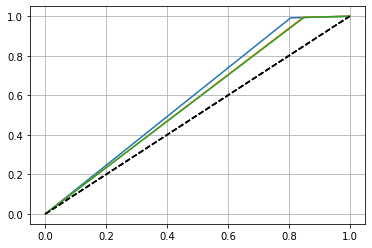

In [150]:
import matplotlib.pyplot as plt
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.grid(True) 
    [...]

plot_roc_curve(fpr1, tpr1)
plot_roc_curve(fpr2, tpr2)
plot_roc_curve(fpr3, tpr3)
plt.show()

In [79]:
whos

Variable                Type                    Data/Info
---------------------------------------------------------
DF1                     DataFrame                            ORIGEN  SECT<...>254794 rows x 27 columns]
KNeighborsClassifier    ABCMeta                 <class 'sklearn.neighbors<...>on.KNeighborsClassifier'>
OrdinalEncoder          type                    <class 'sklearn.preproces<...>encoders.OrdinalEncoder'>
SVC                     ABCMeta                 <class 'sklearn.svm.classes.SVC'>
SVC1                    SVC                     SVC(C=83, cache_size=200,<...>ue, tol=0.001, verbose=1)
SVC2                    SVC                     SVC(C=83, cache_size=200,<...>ue, tol=0.001, verbose=1)
X                       DataFrame                            ORIGEN  SECT<...>254794 rows x 26 columns]
X_test                  DataFrame                            ORIGEN  SECT<...>[84083 rows x 26 columns]
X_train                 DataFrame                            ORIGEN  SECT<

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clfTree = DecisionTreeClassifier(max_depth=12, random_state=42)
y_score = clfTree.fit(X_train, y_train)
predTree = clfTree.predict(X_test)
print(classification_report(y_test, predTree), metrics.accuracy_score(y_test, predTree))

              precision    recall  f1-score   support

           1       0.66      0.42      0.51      1783
           2       0.99      1.00      0.99     82285
          99       0.94      1.00      0.97        15

    accuracy                           0.98     84083
   macro avg       0.86      0.80      0.82     84083
weighted avg       0.98      0.98      0.98     84083
 0.9831000321111283


In [149]:
print("FBeta",fbeta_score(y_test, predTree, average='weighted', beta=0.5),"accuracy:", accuracy_score(y_test, predTree))

FBeta 0.9806385182665036 accuracy: 0.9831000321111283


In [101]:
from sklearn.metrics import precision_recall_curve, roc_curve


In [184]:
fpr, tpr, thresholds = roc_curve(y_test, predTree, pos_label=2)
fpr2, tpr2, thresholds2 = roc_curve(y_test, knn_pred1, pos_label=2)

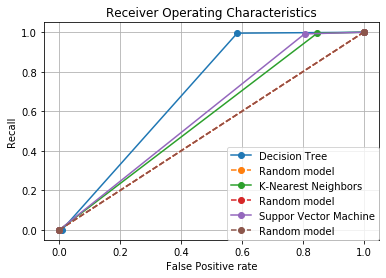

In [207]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, marker='o', label=label)
    plt.plot([0,1],[0,1], 'o--', label="Random model")
    plt.grid(True)
    plt.xlabel('False Positive rate')
    plt.ylabel('Recall')
    plt.title("Receiver Operating Characteristics")
    plt.legend(loc='lower right', borderaxespad=0.)

plot_roc_curve(fpr,tpr, label="Decision Tree")
plot_roc_curve(fpr2,tpr2, label= "K-Nearest Neighbors")
plot_roc_curve(fpr1, tpr1, label="Suppor Vector Machine")
plt.savefig("/Users/paogh/Documents/templatesigconf/aaafiles/ROC.png")
plt.show()

In [124]:
y_train.shape

(170711,)

In [126]:
y_test.shape

(84083,)

In [137]:
from sklearn.metrics import fbeta_score

In [170]:
from sklearn.metrics import roc_auc_score

In [189]:
roc_auc_score(y_test, predTree, multi_class="ovr", labels=[1,2,99])

TypeError: roc_auc_score() got an unexpected keyword argument 'multi_class'

In [176]:
set(y_test)

{1, 2, 99}

In [208]:
clfTree.feature_importances_

array([1.58017468e-02, 1.02895901e-01, 5.06993264e-02, 3.92459476e-03,
       4.49304072e-02, 9.43887696e-02, 3.80395485e-02, 5.04728631e-02,
       4.90640406e-01, 1.98044074e-02, 3.48790215e-02, 3.61717086e-04,
       2.85744371e-03, 4.68737099e-03, 2.31273221e-03, 1.59194636e-03,
       3.76013926e-03, 1.70159202e-03, 5.71905895e-03, 4.36171870e-03,
       1.48541562e-03, 2.60364181e-03, 2.55067562e-03, 7.70486487e-03,
       9.81223441e-03, 2.01245577e-03])